Bônus total: 9

Bônus total: 9

Bônus total: 10

Bônus total: 10

Bônus total: 8

Bônus total: 8

Maior bônus: {'entregas': [(5, 'C', 10)], 'bonus_total': 10}
Maior número de entregas: {'entregas': [(0, 'B', 1), (10, 'D', 8)], 'bonus_total': 9}


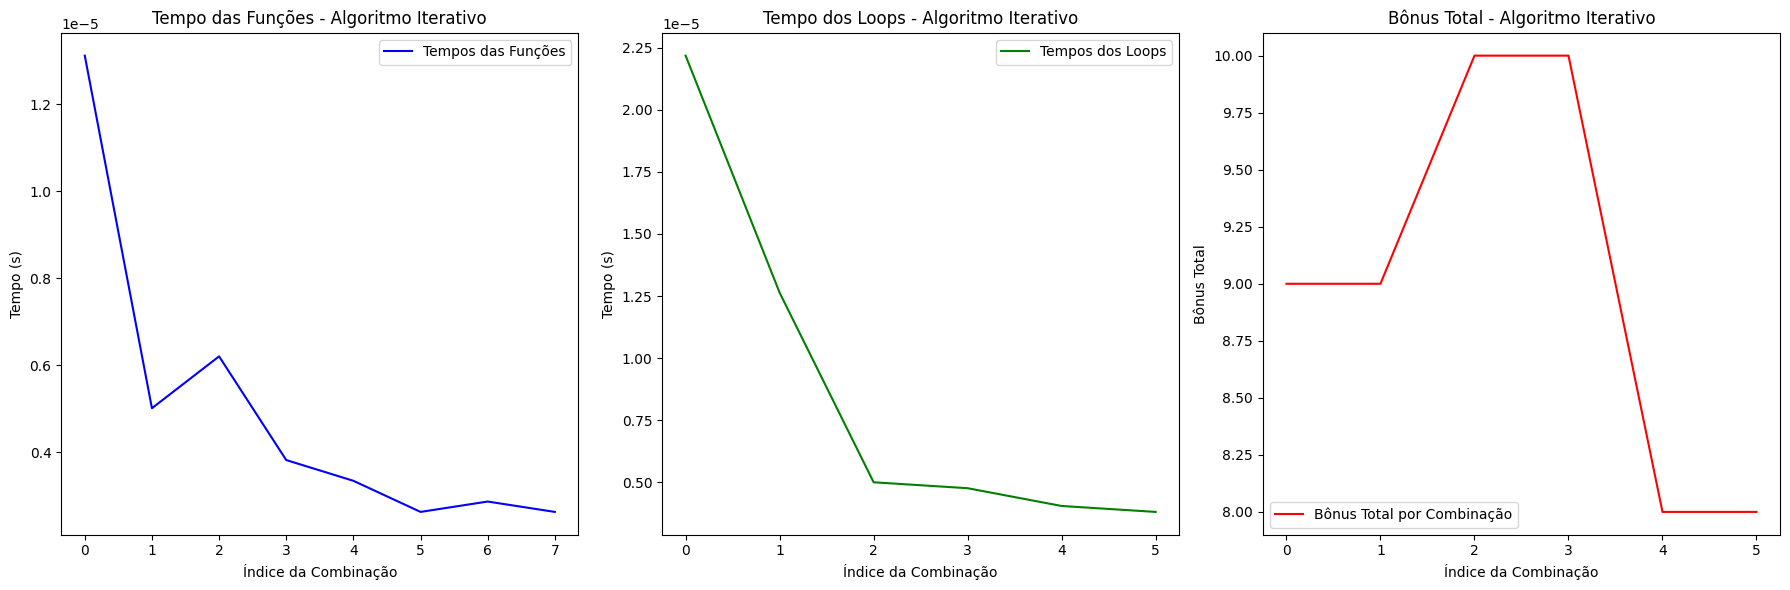

In [4]:
import matplotlib.pyplot as plt
from itertools import permutations
import time

# Definição do grafo e entregas
grafo_conexoes = {
    'A': {'B': 5, 'D': 2},
    'B': {'C': 3, 'A': 5},
    'C': {'B': 3, 'D': 8},
    'D': {'A': 2, 'C': 8},
}

entregas = [
    {'inicio': 0, 'destino': 'B', 'bonus': 1},
    {'inicio': 5, 'destino': 'C', 'bonus': 10},
    {'inicio': 10, 'destino': 'D', 'bonus': 8},
]

combinacoes = list(permutations(entregas))

def buscar_distancia(grafo, no_origem, no_destino):
    stack = [(no_origem, 0, set())]
    menor_distancia = float('inf')

    while stack:
        no_atual, distancia_atual, visitados = stack.pop()

        if no_atual == no_destino:
            menor_distancia = min(menor_distancia, distancia_atual)
            continue

        visitados.add(no_atual)

        for vizinho, distancia in grafo[no_atual].items():
            if vizinho not in visitados:
                stack.append((vizinho, distancia_atual + distancia, visitados.copy()))

    return menor_distancia if menor_distancia != float('inf') else None

maior_bonus = {'entregas': [], 'bonus_total': 0}
maior_entregas = {'entregas': [], 'bonus_total': 0}

tempos_funcoes = []  # Lista para armazenar tempos das funções
tempos_loops = []    # Lista para armazenar tempos dos loops
tempos_bônus = []    # Lista para armazenar bônus totais

for idx, combinacao in enumerate(combinacoes, 1):
    tempo_inicio = 0
    bonus_total = 0
    tempo_atual = tempo_inicio
    entregas_feitas = []

    tempo_loop_start = time.time()  # Início da medição do loop

    for entrega in combinacao:
        destino = entrega['destino']
        bonus = entrega['bonus']
        inicio = entrega['inicio']

        if tempo_atual <= inicio:
            # Medir o tempo de execução da função buscar_distancia
            tempo_func_start = time.time()
            distancia = buscar_distancia(grafo_conexoes, 'A', destino)
            tempos_funcoes.append(time.time() - tempo_func_start)  # Registro do tempo da função

            tempo_atual = inicio
            tempo_atual += distancia * 2
            bonus_total += bonus
            entregas_feitas.append((inicio, destino, bonus))
        else:
            continue

    tempos_loops.append(time.time() - tempo_loop_start)  # Registro do tempo do loop
    tempos_bônus.append(bonus_total)  # Adiciona o bônus total da combinação

    if bonus_total > maior_bonus['bonus_total']:
        maior_bonus['entregas'] = entregas_feitas
        maior_bonus['bonus_total'] = bonus_total

    if len(entregas_feitas) > len(maior_entregas['entregas']):
        maior_entregas['entregas'] = entregas_feitas
        maior_entregas['bonus_total'] = bonus_total

    print(f'Bônus total: {bonus_total}\n')

print(f'Maior bônus: {maior_bonus}')
print(f'Maior número de entregas: {maior_entregas}')

# Geração dos gráficos com matplotlib
plt.figure(figsize=(18, 6))

# Gráfico de tempo das funções
plt.subplot(1, 3, 1)
plt.plot(tempos_funcoes, label='Tempos das Funções', color='blue')
plt.xlabel('Índice da Combinação')
plt.ylabel('Tempo (s)')
plt.title('Tempo das Funções - Algoritmo Iterativo')
plt.legend()

# Gráfico de tempo dos loops
plt.subplot(1, 3, 2)
plt.plot(tempos_loops, label='Tempos dos Loops', color='green')
plt.xlabel('Índice da Combinação')
plt.ylabel('Tempo (s)')
plt.title('Tempo dos Loops - Algoritmo Iterativo')
plt.legend()

# Gráfico do bônus total
plt.subplot(1, 3, 3)
plt.plot(tempos_bônus, label='Bônus Total por Combinação', color='red')
plt.xlabel('Índice da Combinação')
plt.ylabel('Bônus Total')
plt.title('Bônus Total - Algoritmo Iterativo')
plt.legend()

plt.tight_layout()
plt.show()
